# Load Datasets

In [ ]:
import pandas as pd

In [12]:
pip install numpy pandas matplotlib scikit-learn prophet joblib flask

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 2.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/12.1 MB 2.4 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/12.1 MB 2.7 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/12.1 MB 2.8 MB/s eta 0:00:04
   ---------- ----------------------------- 3.1/12.1 MB 3.0 MB/s eta 0:00:03
   ------------- -------------------------- 4.2/12.1 MB 3.4 MB/s eta 0:00:03
   ----------------- ---------------------- 5.2/12.1 MB 3.6 MB/s eta 0:00:02
   ---------------------- ----------------- 6.8/12.1 MB 4.0 MB/s eta 0:00:02
   -------------------------- ------------- 8.1/12.1 MB 4.3 MB/s eta 0:00:01
   -------------------------------- ------- 9.7/12.1 MB 4.6 MB/s eta 0:00:01
   ---------------------------------- ----- 10.5/12.1 MB 4.6 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#import os
# Change working directory to your project folder
#os.chdir(r"H:\PROJECTS\AIML PROJECTS\SmartStockAI")
#print(os.getcwd())


In [3]:
# Load CSVs
products = pd.read_csv("data/product_details.csv")
inventory = pd.read_csv("data/inventory_data.csv")
anomalies = pd.read_csv("data/anomalies.csv")

# Quick look at data
print("-"*80)
print(products.head())
print("-"*80)
print(inventory.head())
print("-"*80)
print(anomalies.head())
print("-"*80)

--------------------------------------------------------------------------------
  Product_ID              Product_Name       Category               Brand  \
0       P001             Tata Salt 1kg        Grocery                Tata   
1       P002   Colgate Toothpaste 100g  Personal Care             Colgate   
2       P003  Fortune Sunflower Oil 1L        Grocery        Adani Wilmar   
3       P004              Lux Soap Bar  Personal Care  Hindustan Unilever   
4       P005  Britannia Marie Biscuits         Snacks           Britannia   

   Cost_Price  Selling_Price  Reorder_Level  Shelf_Life_Days  
0          20             25             30              730  
1          40             60             25              720  
2         120            150             40              365  
3          25             40             20              730  
4          15             25             30              180  
------------------------------------------------------------------------------

In [4]:
# Merge on Product_ID
data = inventory.merge(products, on='Product_ID', how='left')
print(data.head())


         Date Warehouse_ID Product_ID            Product_Name_x  \
0  2025-01-01         W001       P001             Tata Salt 1kg   
1  2025-01-01         W001       P002   Colgate Toothpaste 100g   
2  2025-01-01         W001       P003  Fortune Sunflower Oil 1L   
3  2025-01-01         W001       P004              Lux Soap Bar   
4  2025-01-01         W001       P005  Britannia Marie Biscuits   

      Category_x             Brand_x  Stock_Level  Sales  Reorder_Level_x  \
0        Grocery                Tata          222     21               30   
1  Personal Care             Colgate          126     16               25   
2        Grocery        Adani Wilmar          230     23               40   
3  Personal Care  Hindustan Unilever          216     15               20   
4         Snacks           Britannia          140     -1               30   

             Product_Name_y     Category_y             Brand_y  Cost_Price  \
0             Tata Salt 1kg        Grocery              

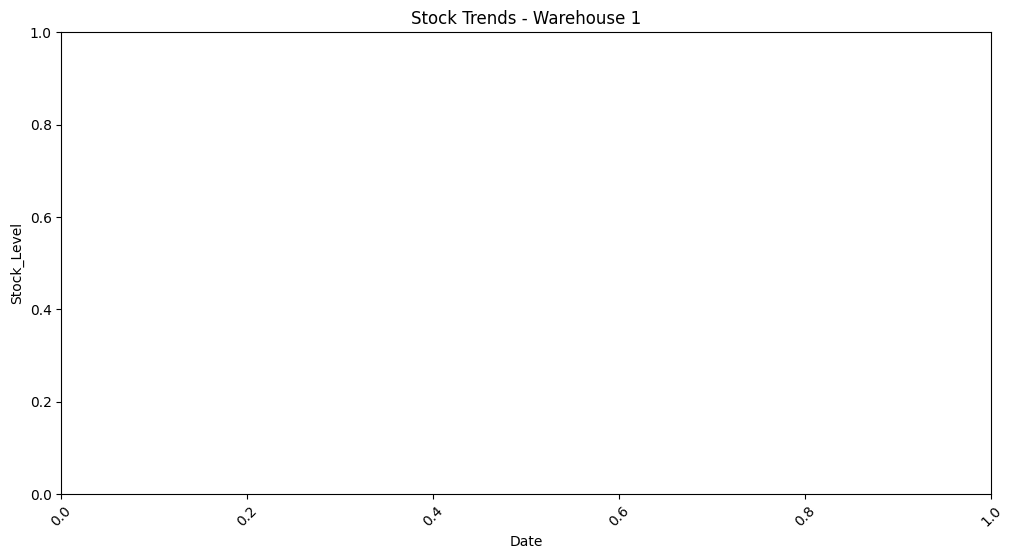

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

warehouse_id = 1
warehouse_data = data[data['Warehouse_ID'] == warehouse_id]

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Stock_Level', hue='Product_Name_x', data=warehouse_data)
plt.title(f"Stock Trends - Warehouse {warehouse_id}")
plt.xticks(rotation=45)
plt.show()


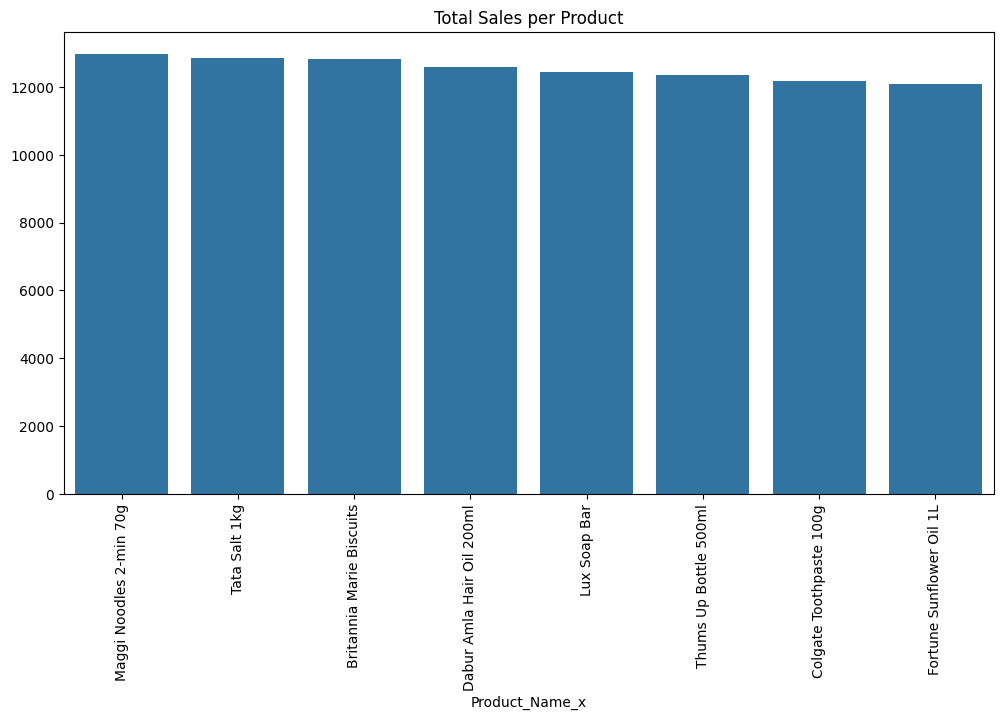

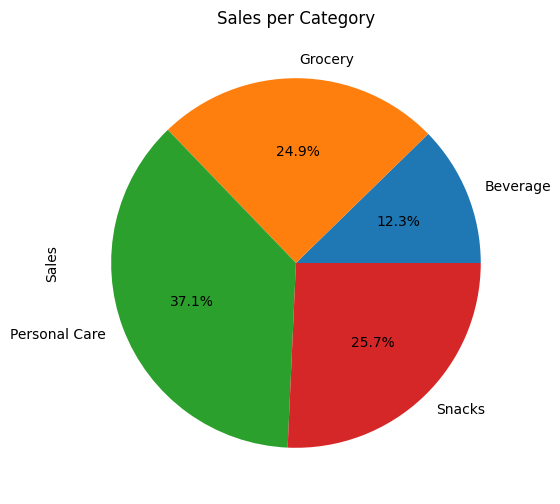

In [10]:
# Sales per product
sales_product = data.groupby('Product_Name_x')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=sales_product.index, y=sales_product.values)
plt.title("Total Sales per Product")
plt.xticks(rotation=90)
plt.show()

# Sales per category
sales_category = data.groupby('Category_x')['Sales'].sum()
sales_category.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Sales per Category')
plt.show()


In [ ]:
from prophet import Prophet

# Single product in one warehouse
product_id, warehouse_id = 1, 1
df = data[(data['Product_ID']==product_id) & (data['Warehouse_ID']==warehouse_id)][['Date', 'Sales']]
df = df.rename(columns={'Date':'ds', 'Sales':'y'})

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.show()

Importing plotly failed. Interactive plots will not work.


AttributeError: 'Prophet' object has no attribute 'stan_backend'